# PRACTICE EXERCISES WITH REGRESSION AND RANDOM FOREST

In [120]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

In [121]:
#Import data
df = pd.read_csv('housingdata.csv')

In [122]:
#Name columns
df.columns= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### - Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

En el procesamiento de datos del ejercicio anterior, se encontró que "LSTAT" Y "RM" fueron las variables cón mayor corelación para determinar el precio de la vivienda en Boston.

Los modelos de regresión utilizados serán regresión lineal multiple y Random Forest.



### MULTIPLE LINEAR REGRESSION

In [123]:
#Multiple Linear regression
#Divide the dataset in training(input) and testing(output)
#The expected output of the model is the median value of occupied homes by using [LSTAT] and [RM] columns as inputs
housing_input = pd.DataFrame(np.c_[df['LSTAT'], df['RM']],columns=['LSTAT','RM'])
housing_output = df['MEDV']

In [124]:
#Divide the dataset into training & testing sets with 33% of the datasets being allocated to testing set.
X_train, X_test, y_train, y_test = train_test_split(housing_input,housing_output,test_size=0.33)

In [125]:
#Verify shape of the training and test sets
print(f"y_test: {y_test.shape}, y_train: {y_train.shape},X_test: {X_test.shape},X_train: {X_train.shape}")

y_test: (167,), y_train: (338,),X_test: (167, 2),X_train: (338, 2)


In [126]:
#train and test the model using sklearn
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [127]:
#linear regression formula y = c + mLSTAT +  mRM
# m = slope 
linear_model.coef_

array([-0.66060679,  4.51794004])

In [128]:
#c = the intercept
linear_model.intercept_

2.619777967343662

### - Ejercicio 2
Compárales en base al RMSE y al R2.

### MULTIPLE LINEAR REGRESSION

In [129]:
#Now, we test the test set 
house_price_prediction = linear_model.predict(X_test)
#We evaluate the test set using R2
r_squared_test = r2_score(y_test, house_price_prediction)
#We evaluate the test prediction using Root Mean Squared Error
root_mean_squared_e_test = np.sqrt(mean_squared_error(y_test,house_price_prediction))

In [130]:
# Check the prediction of current model with LSTAT and RM values from row 0 of the data set
print(f'Predicted value when LSTAT is 9.14 and RM is 6.42 =  {linear_model.predict([[9.14,6.421]])[0]} vs real value = 21.6')


Predicted value when LSTAT is 9.14 and RM is 6.42 =  25.591524924148295 vs real value = 21.6


In [131]:
print("The performance of the test set on linear regresion model is:")
print(f"R2 is {r_squared_test}")
print(f"RMSE is {root_mean_squared_e_test}")

The performance of the test set on linear regresion model is:
R2 is 0.652576184863664
RMSE is 5.657041816031338


### Prediction vs True for MLR

Text(0, 0.5, 'Predicted value')

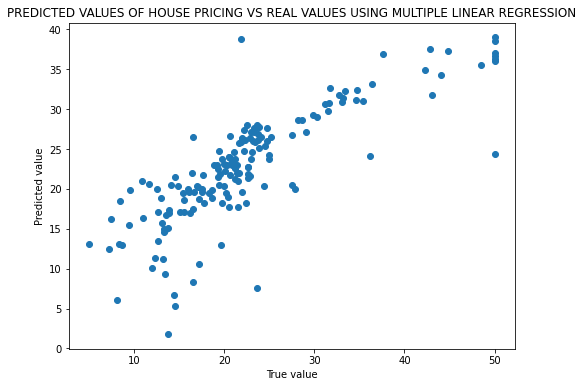

In [141]:
plt.figure(figsize= (8,6))
plt.scatter(y_test,house_price_prediction)
plt.title("PREDICTED VALUES OF HOUSE PRICING VS REAL VALUES USING MULTIPLE LINEAR REGRESSION")
plt.xlabel('True value')
plt.ylabel('Predicted value')


### RANDOM FOREST

In [133]:
#We use the previously defined features and target (iput/output) and the same  train/test distribution
housing_input
housing_output
X_train, X_test, y_train, y_test 

(     LSTAT     RM
 346   6.36  6.516
 454  18.13  6.525
 58    9.22  5.927
 453  18.71  6.728
 105  18.66  5.836
 ..     ...    ...
 377  23.69  6.380
 315  18.33  5.914
 181   4.82  7.155
 477  18.03  6.185
 102  13.44  6.137
 
 [338 rows x 2 columns],
      LSTAT     RM
 239  11.38  6.897
 435  18.05  6.461
 252   3.54  8.259
 287   7.60  6.315
 34    9.68  5.933
 ..     ...    ...
 95   11.34  6.163
 201   3.11  7.610
 256   5.12  8.704
 382  24.56  5.520
 24   16.51  5.599
 
 [167 rows x 2 columns],
 346    23.1
 454    14.1
 58     19.6
 453    14.9
 105    19.5
        ... 
 377    13.1
 315    17.8
 181    37.9
 477    14.6
 102    19.3
 Name: MEDV, Length: 338, dtype: float64,
 239    22.0
 435     9.6
 252    42.8
 287    22.3
 34     18.9
        ... 
 95     21.4
 201    42.3
 256    50.0
 382    12.3
 24     13.9
 Name: MEDV, Length: 167, dtype: float64)

In [134]:
#We train the algorithm using an object of RandomForest
regressor = RandomForestRegressor(n_estimators=20)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20)

In [135]:
#We test the model
house_price_prediction_rf = regressor.predict(X_test)

In [136]:
# Check the prediction of current model with LSTAT and RM values from row 0 of the data set
print(f'Predicted value when LSTAT is 9.14 and RM is 6.42 =  {regressor.predict([[9.14,6.421]])[0]} vs real value = 21.6')

Predicted value when LSTAT is 9.14 and RM is 6.42 =  22.52500000000001 vs real value = 21.6


In [137]:
#We evaluate the test set using R2
r_squared_test_ranforest = r2_score(y_test, house_price_prediction_rf)
#We evaluate the test prediction using Root Mean Squared Error
root_mean_squared_e_test_ranforest = np.sqrt(mean_squared_error(y_test,house_price_prediction_rf))

In [138]:
print("The performance of the test set on linear regresion model is:")
print(f"R2 is {r_squared_test_ranforest}")
print(f"RMSE is {root_mean_squared_e_test_ranforest}")

The performance of the test set on linear regresion model is:
R2 is 0.7291217216788225
RMSE is 4.9951287498466845


### Prediction vs True for Random Forest

Text(0, 0.5, 'Predicted value')

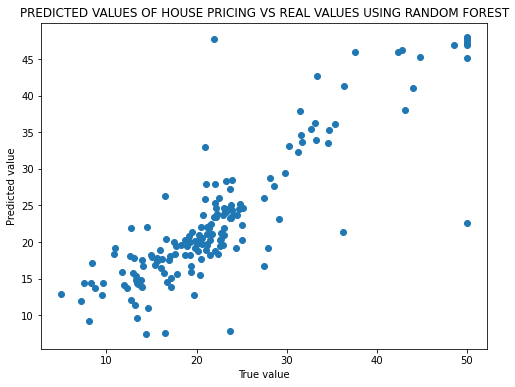

In [140]:
plt.figure(figsize= (8,6))
plt.scatter(y_test,house_price_prediction_rf)
plt.title("PREDICTED VALUES OF HOUSE PRICING VS REAL VALUES USING RANDOM FOREST")
plt.xlabel('True value')
plt.ylabel('Predicted value')

Both models perform well under the problem at hand. Nevertheless, when comparing the performance of the multiple linear regresion model compared to the Random Forests one, it can be seen that the latter has a better performance, since the difference between true value and expected house price (RMSE) is lower and a higher R2 score, sugggesting greater alignment with the tendency of the dataset. 